In [35]:
import iris
import iris.coord_categorisation
import matplotlib.pyplot as plt
import datetime
import iris.plot as iplt
import iris.quickplot as qplt
import cartopy
import cartopy.crs as ccrs
import numpy as np
import cartopy.io.shapereader as shpreader
%matplotlib inline

iris.FUTURE.netcdf_promote = True

In [36]:
# Load some sample data. You will need to replace the filename below with a file on your computer.
# File can be downloaded from: 
# http://amma2050.ipsl.upmc.fr/CMIP5_AFRICA/0.5x0.5/HadGEM2-ES/rcp85/pr_day_HadGEM2-ES_africa_0.5x0.5_rcp85_r1i1p1_full.nc
# Username: Amma2050
# Password: @amma2050!

#path = 'C://Users/cornkle/data/CEH/AMMA/workshop2016/amma2050.ipsl.upmc.fr/CMIP5_AFRICA/0.5x0.5/HadGEM2-ES/rcp85/'
path = '/Users/ajh235/Work/Projects/AMMA-2050/'
file = 'pr_day_HadGEM2-ES_africa_0.5x0.5_rcp85_r1i1p1_full.nc'

In [47]:
cube = iris.load_cube(path+file)

In [48]:
print(cube)

precipitation_flux / (kg m-2 s-1)   (time: 33840; latitude: 160; longitude: 150)
     Dimension coordinates:
          time                           x                -               -
          latitude                       -                x               -
          longitude                      -                -               x
     Attributes:
          CDI: Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_HadGEM2-ES_historical_r0i0p0.nc...
          branch_time: 0.0
          cmor_version: 2.5.0
          comment: at surface; includes both liquid and solid phases from all types of clouds...
          contact: chris.d.jones@metoffice.gov.uk, michael.sanderson@metoffice.gov.uk
          creation_date: 2010-12-30T10:15:49Z
          experiment: 

In [49]:
# Extract West Africa domain
cube = cube.intersection(longitude=(-20.0, 30.0), latitude=(0.0, 30.0))


In [50]:
# Make sure we have the precipitation field and convert units
pcp = cube.extract('precipitation_flux')
pcp.convert_units('kg m-2 day-1')

# Add month coordinate
iris.coord_categorisation.add_month_number(pcp, 'time', name='month')

In [51]:
print(pcp)

precipitation_flux / (kg m-2 day-1) (time: 33840; latitude: 60; longitude: 100)
     Dimension coordinates:
          time                           x                -              -
          latitude                       -                x              -
          longitude                      -                -              x
     Auxiliary coordinates:
          month                          x                -              -
     Attributes:
          CDI: Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_HadGEM2-ES_historical_r0i0p0.nc...
          branch_time: 0.0
          cmor_version: 2.5.0
          comment: at surface; includes both liquid and solid phases from all types of clouds...
          contact: chris.d.jones@metoffice.gov.uk, mich

In [52]:
# Need to add bounds to the coordinates so that iris knows the bounding coordinates of each grid cell ...
print('Before ...')
print(pcp.coord('latitude'))
print(pcp.coord('longitude'))

pcp.coord('latitude').guess_bounds()
pcp.coord('longitude').guess_bounds()

print('After ...')
print(pcp.coord('latitude'))
print(pcp.coord('longitude'))

Before ...
DimCoord(array([  0.25,   0.75,   1.25,   1.75,   2.25,   2.75,   3.25,   3.75,
         4.25,   4.75,   5.25,   5.75,   6.25,   6.75,   7.25,   7.75,
         8.25,   8.75,   9.25,   9.75,  10.25,  10.75,  11.25,  11.75,
        12.25,  12.75,  13.25,  13.75,  14.25,  14.75,  15.25,  15.75,
        16.25,  16.75,  17.25,  17.75,  18.25,  18.75,  19.25,  19.75,
        20.25,  20.75,  21.25,  21.75,  22.25,  22.75,  23.25,  23.75,
        24.25,  24.75,  25.25,  25.75,  26.25,  26.75,  27.25,  27.75,
        28.25,  28.75,  29.25,  29.75]), standard_name='latitude', units=Unit('degrees'), long_name='latitude', var_name='lat')
DimCoord(array([-19.75, -19.25, -18.75, -18.25, -17.75, -17.25, -16.75, -16.25,
       -15.75, -15.25, -14.75, -14.25, -13.75, -13.25, -12.75, -12.25,
       -11.75, -11.25, -10.75, -10.25,  -9.75,  -9.25,  -8.75,  -8.25,
        -7.75,  -7.25,  -6.75,  -6.25,  -5.75,  -5.25,  -4.75,  -4.25,
        -3.75,  -3.25,  -2.75,  -2.25,  -1.75,  -1.25,  -0.75,

In [54]:
perc = pcp.aggregated_by('month', iris.analysis.PERCENTILE, percent=95)

print(perc)
print(perc.coord('percentile_over_month'))

/Users/ajh235/miniconda/envs/py34/lib/python3.4/site-packages/iris/coords.py:495: VisibleDeprecationWarning: an index can only have a single Ellipsis (`...`); replace all but one with slices (`:`).
  bounds = bounds[keys + (Ellipsis, )]


precipitation_flux / (kg m-2 day-1) (time: 12; latitude: 60; longitude: 100)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Auxiliary coordinates:
          month                          x             -              -
     Scalar coordinates:
          percentile_over_month: 95
     Attributes:
          CDI: Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_HadGEM2-ES_historical_r0i0p0.nc...
          branch_time: 0.0
          cmor_version: 2.5.0
          comment: at surface; includes both liquid and solid phases from all types of clouds...
         

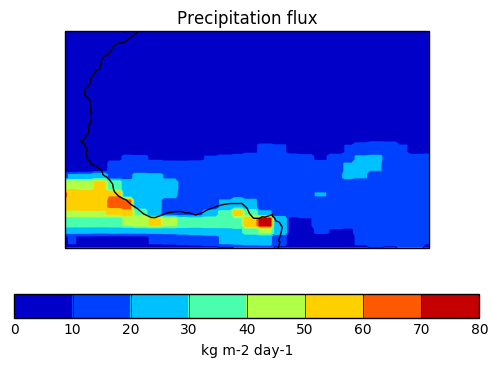

In [57]:
icon_perc = iris.Constraint(percentile_over_month=95)
icon_mon  = iris.Constraint(month=7)
qplt.contourf(perc.extract(icon_perc & icon_mon))
plt.gca().coastlines()

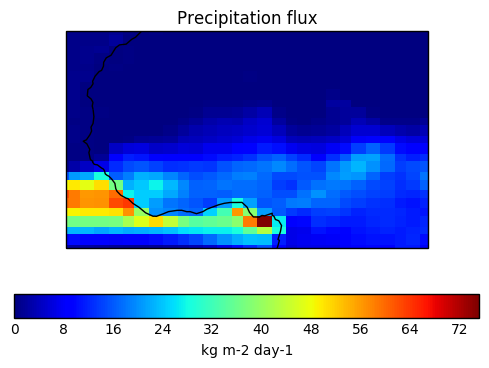

In [58]:
# Alternatively, we can plot using pcolormesh, which plots the grid cells without the smoothing ...
qplt.pcolormesh(perc.extract(icon_perc & icon_mon))
plt.gca().coastlines()

In [59]:
# How many times 
thresh = pcp.collapsed(['time'], iris.analysis.COUNT, function = lambda values: values > 10 )
print(thresh)

/Users/ajh235/miniconda/envs/py34/lib/python3.4/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month'.
  warnings.warn(msg.format(self.name()))


precipitation_flux / (1)            (latitude: 60; longitude: 100)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          month: 6, bound=(1, 12)
          time: 2053-01-01 00:00:00, bound=(2006-01-01 00:00:00, 2100-01-01 00:00:00)
     Attributes:
          CDI: Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_HadGEM2-ES_historical_r0i0p0.nc...
          branch_time: 0.0
          cmor_version: 2.5.0
          comment: at surface; includes both liquid and solid phases from all types of clouds...
          contact: chris.d.jones@metoffice.gov.uk, michael.sanderson@metoffice.gov.uk
          creation_date: 2010-12-30T10:15

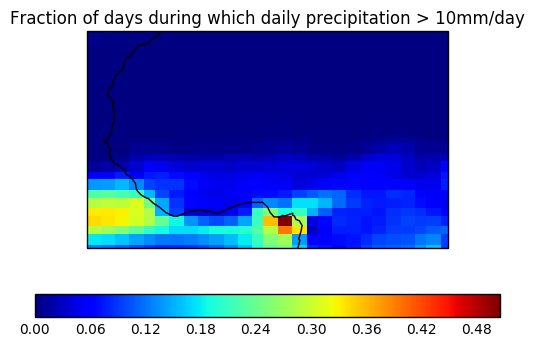

In [62]:
qplt.pcolormesh(thresh / len(pcp.coord('time').points))
plt.title('Fraction of days during which daily precipitation > 10mm/day')
plt.gca().coastlines()

In [146]:
pcp

<iris 'Cube' of precipitation_flux / (kg m-2 day-1) (time: 33840; latitude: 42; longitude: 86)>

In [63]:
def count_spells(data, threshold, axis, spell_length):
    if axis < 0:
        # just cope with negative axis numbers
        axis += data.ndim
    # Threshold the data to find the 'significant' points.
    data_hits = data < threshold
    # Make an array with data values "windowed" along the time axis.
    hit_windows = iris.util.rolling_window(data_hits, window=spell_length, axis=axis)
    # Find the windows "full of True-s" (along the added 'window axis').
    full_windows = np.all(hit_windows, axis=axis+1)
    # Count points fulfilling the condition (along the time axis).
    spell_point_counts = np.sum(full_windows, axis=axis, dtype=int)
    return spell_point_counts

In [64]:
 # Make an aggregator from dry spell count user function
count = iris.analysis.Aggregator('spell_count',count_spells,
                                 units_func=lambda units: 1)


In [69]:
# Define the parameters of the test.
thresh_rain = 1
spell_days = 6

# Calculate the statistic.
dry_spell = pcp.collapsed('time', count,threshold=thresh_rain,
                                      spell_length=spell_days)
dry_spell.rename('Number of days with rain < 1mm day-1 over 6 consecutive days')

/Users/ajh235/miniconda/envs/py34/lib/python3.4/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month'.
  warnings.warn(msg.format(self.name()))


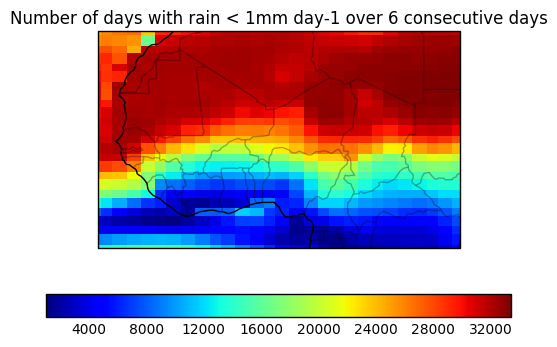

In [77]:
# ax = plt.axes(projection=cartopy.crs.PlateCarree())
qplt.pcolormesh(dry_spell)
plt.gca().add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.3)
plt.gca().coastlines()

In [78]:
iris.coord_categorisation.add_year(pcp, 'time', name='year')
# Quick mean temperature
p_mean = pcp.aggregated_by(['year'], iris.analysis.MEAN)

/Users/ajh235/miniconda/envs/py34/lib/python3.4/site-packages/iris/coords.py:495: VisibleDeprecationWarning: an index can only have a single Ellipsis (`...`); replace all but one with slices (`:`).
  bounds = bounds[keys + (Ellipsis, )]


In [79]:
pmean=p_mean.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)

/Users/ajh235/miniconda/envs/py34/lib/python3.4/site-packages/iris/cube.py:3254: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


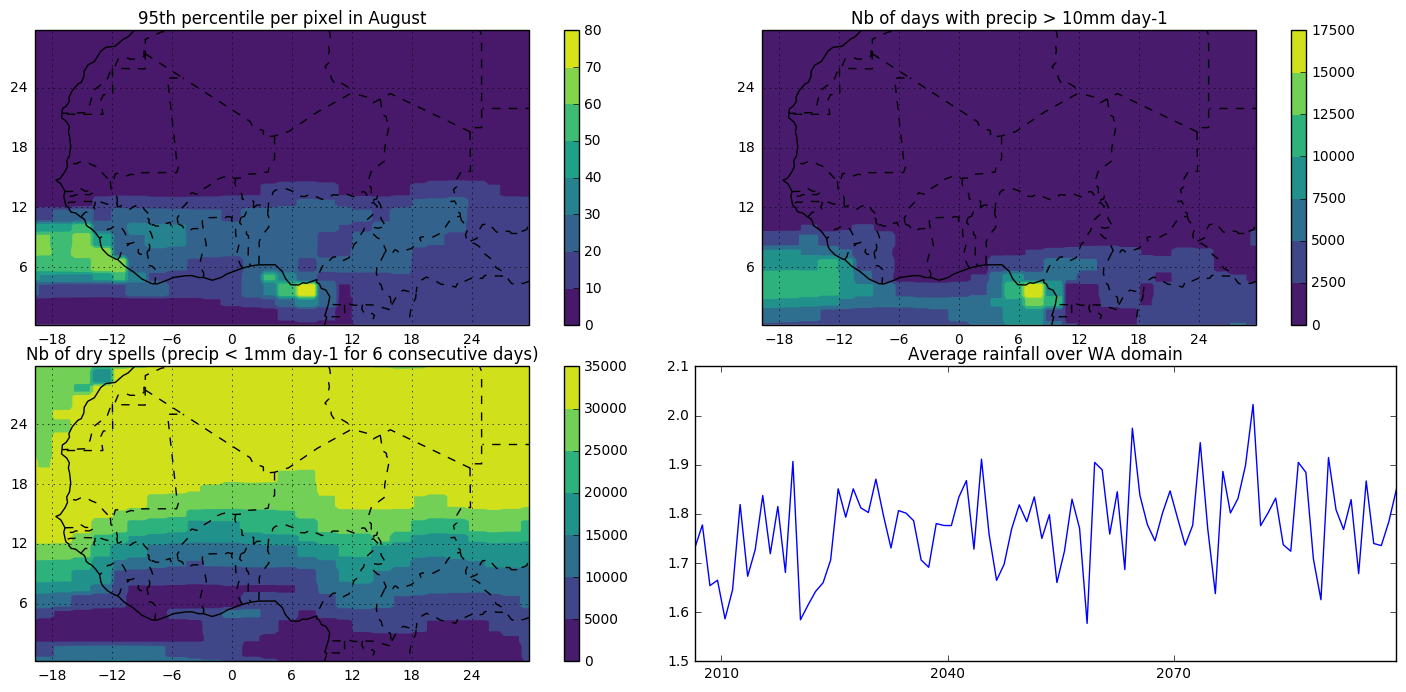

In [80]:
fig = plt.figure(figsize=(15,7), dpi=300)
ax=fig.add_subplot(2,2,1 , projection=ccrs.PlateCarree())
iplt.contourf(perc[7], cmap='viridis')
plt.title('95th percentile per pixel in August')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()
    
ax=fig.add_subplot(2,2,2, projection=ccrs.PlateCarree())
iplt.contourf(thresh, cmap='viridis')
plt.title('Nb of days with precip > 10mm day-1')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()

ax=fig.add_subplot(2,2,3, projection=ccrs.PlateCarree())
iplt.contourf(dry_spell, cmap='viridis')
plt.title('Nb of dry spells (precip < 1mm day-1 for 6 consecutive days)')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()

ax = fig.add_subplot(2, 2, 4)
iplt.plot(pmean)
plt.title('Average rainfall over WA domain')

plt.tight_layout()
plt.show()